# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [6]:
model = Sequential()


### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
#act = PReLU(shared_axes=[1, 2])
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same')) 
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      1568      
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
activation_6 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 128)     16512     
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
activation_7 (Activation)    (None, 112, 112, 128)     0         
__________

### Train

In [8]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch34.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=200,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=100,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Epoch 1/100
200/200 [==============================] - 134s 672ms/step - loss: 7095.6083 - acc: 0.0039 - val_loss: 6215.4342 - val_acc: 0.0066

Epoch 00001: val_loss improved from inf to 6215.43422, saving model to Saved_Models/weights.best.from_scratch34.hdf5
Epoch 2/100
200/200 [==============================] - 129s 643ms/step - loss: 2796.6973 - acc: 0.0072 - val_loss: 2450.1166 - val_acc: 0.0079

Epoch 00002: val_loss improved from 6215.43422 to 2450.11663, saving model to Saved_Models/weights.best.from_scratch34.hdf5
Epoch 3/100
200/200 [==============================] - 128s 640ms/step - loss: 701.2824 - acc: 0.0063 - val_loss: 56.2997 - val_acc: 0.0094

Epoch 00003: val_loss improved from 2450.11663 to 56.29971, saving model to Saved_Models/weights.best.from_scratch34.hdf5
Epoch 4/100
200/200 [==============================] - 128s 642ms/step - loss: 89.8558 - acc: 0.0078 - val_loss: 39.7894 - val_acc: 0.0088

Epoch 00004: val_loss improved from 56.29971 to 39.78938, saving mod

200/200 [==============================] - 129s 645ms/step - loss: 21.6494 - acc: 0.0084 - val_loss: 11.6475 - val_acc: 0.0072

Epoch 00040: val_loss did not improve from 8.31422
Epoch 41/100
200/200 [==============================] - 129s 644ms/step - loss: 21.2617 - acc: 0.0078 - val_loss: 25.9395 - val_acc: 0.0101

Epoch 00041: val_loss did not improve from 8.31422
Epoch 42/100
200/200 [==============================] - 130s 650ms/step - loss: 25.8543 - acc: 0.0086 - val_loss: 18.3274 - val_acc: 0.0089

Epoch 00042: val_loss did not improve from 8.31422
Epoch 43/100
200/200 [==============================] - 129s 643ms/step - loss: 21.2891 - acc: 0.0080 - val_loss: 19.6330 - val_acc: 0.0075

Epoch 00043: val_loss did not improve from 8.31422
Epoch 44/100
200/200 [==============================] - 128s 641ms/step - loss: 21.2184 - acc: 0.0081 - val_loss: 19.8113 - val_acc: 0.0089

Epoch 00044: val_loss did not improve from 8.31422
Epoch 45/100
200/200 [==============================]

200/200 [==============================] - 132s 658ms/step - loss: 21.2716 - acc: 0.0092 - val_loss: 29.1632 - val_acc: 0.0079

Epoch 00082: val_loss did not improve from 7.86507
Epoch 83/100
200/200 [==============================] - 135s 677ms/step - loss: 21.6451 - acc: 0.0080 - val_loss: 19.8179 - val_acc: 0.0082

Epoch 00083: val_loss did not improve from 7.86507
Epoch 84/100
200/200 [==============================] - 136s 682ms/step - loss: 21.2164 - acc: 0.0080 - val_loss: 18.2921 - val_acc: 0.0092

Epoch 00084: val_loss did not improve from 7.86507
Epoch 85/100
200/200 [==============================] - 135s 673ms/step - loss: 21.3104 - acc: 0.0086 - val_loss: 19.9581 - val_acc: 0.0085

Epoch 00085: val_loss did not improve from 7.86507
Epoch 86/100
200/200 [==============================] - 140s 701ms/step - loss: 21.2993 - acc: 0.0080 - val_loss: 17.7136 - val_acc: 0.0094

Epoch 00086: val_loss did not improve from 7.86507
Epoch 87/100
200/200 [==============================]

In [9]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,6215.434221,0.006604,7123.322828,0.003923
1,1,2450.116626,0.007911,2805.227388,0.007219
2,2,56.299711,0.009434,700.840115,0.006305
3,3,39.789381,0.008805,88.483917,0.007847
4,4,27.428501,0.007911,87.395779,0.007376
5,5,18.986036,0.009119,24.657984,0.009730
6,6,24.479259,0.008544,21.952512,0.007847
7,7,19.442149,0.009119,79.252541,0.008318
8,8,23.729940,0.007547,21.483425,0.007533
9,9,13.660918,0.008228,21.397475,0.008788


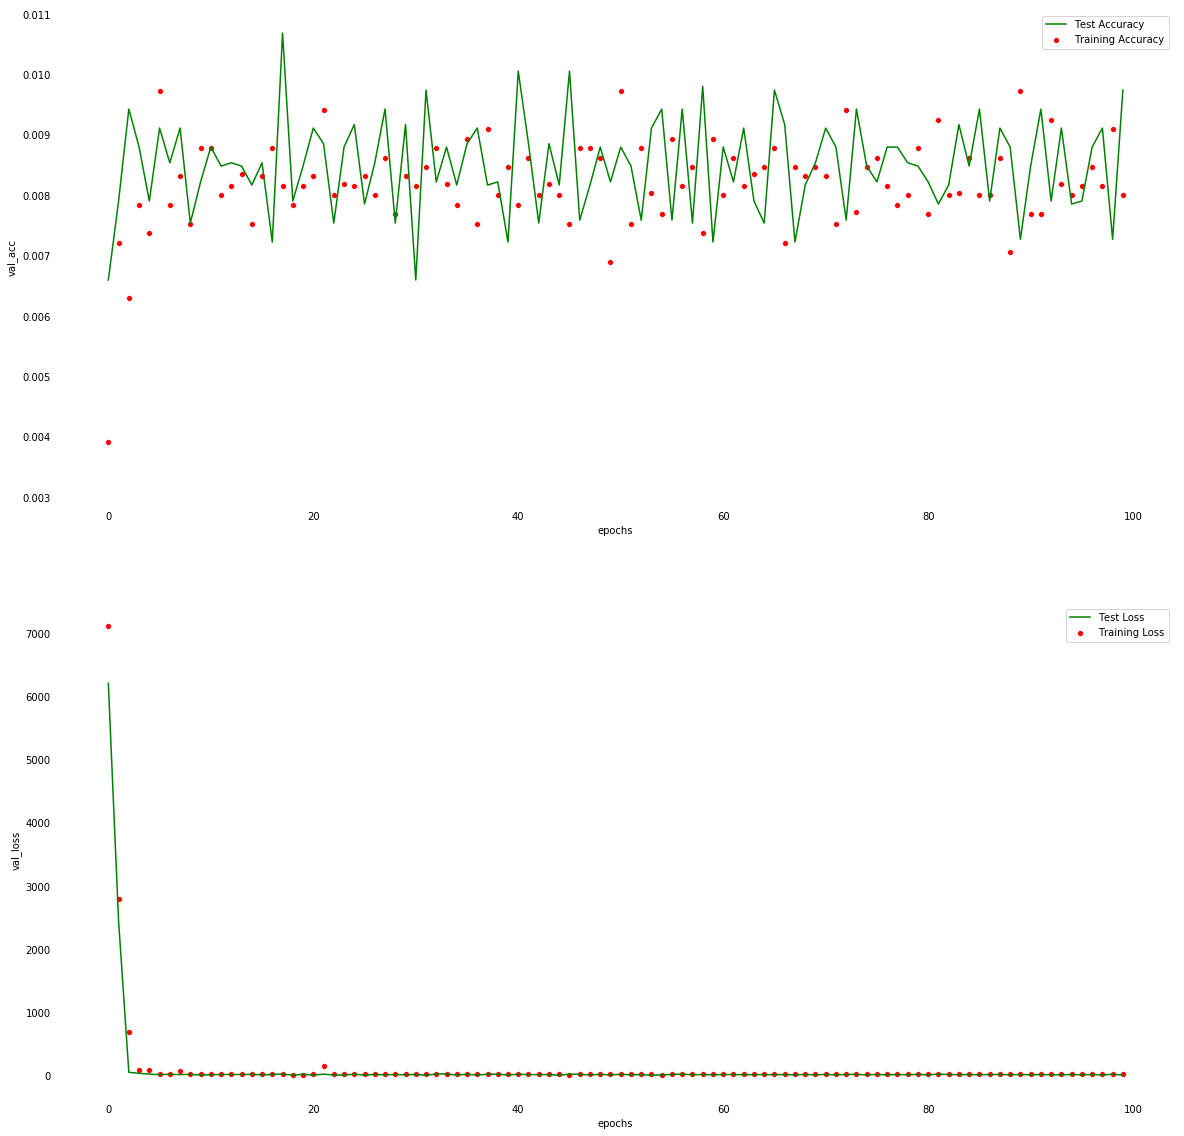

In [10]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters